# Further Cleaning

import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading modified data from local repository 

In [4]:
from google.colab import drive
M2 = pd.read_csv ('/content/drive/MyDrive/new_data.csv')
M2.head()

,Date,Count
0,2022-01-01,22332
1,2022-01-02,23324
2,2022-01-03,8887
3,2022-01-04,22684
4,2022-01-05,19482


Convert object type into datetime types

In [5]:
M2['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
M2.head()
M2['Date'] = pd.to_datetime(M2['Date'], format='%Y%m%d')# convert it into normalized forms.
print(M2.dtypes)

Date     datetime64[ns]
Count             int64
dtype: object


Aggregate by weekly data

In [7]:
M2_week=M2 
M2_week=M2_week.resample('W-Mon', on='Date').sum() # resample into week
M2_week.head() # check the weekly step counts.

,Count
Date,
2022-01-03,54543
2022-01-10,125155
2022-01-17,122669
2022-01-24,116574
2022-01-31,92376


# Visualising the trend

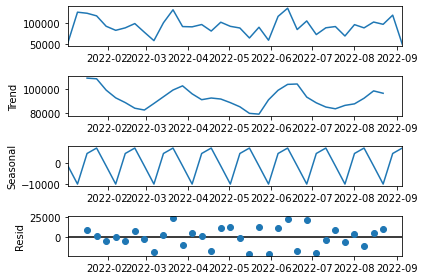

In [9]:
m2 = M2_week
m2['date'] = m2.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m2.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()

plot trend on matplotlib

(array([738156., 738187., 738215., 738246., 738276., 738307., 738337.,
        738368., 738399.]), <a list of 9 Text major ticklabel objects>)

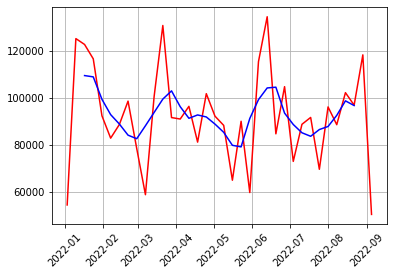

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m2.index, m2['Count'], c='red')
plt.plot(decomposition.trend.index, decomposition.trend, c='blue')
plt.xticks(rotation=45)

# Conclusions

The trend of this data shows substantial fluctuation. It is obvious that there exist some weeks which participant2 walked a lot and some weeks which he/she did not walked too much. What could the reasons be? Given that this participant is a student, we may consider that the exam period had a influence on his/her willingness to walk.